In [27]:
#Tasks-1
# Text Preprocessing: Tokenize the text into words.
# libraries for tokenization
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# This is the dataset
docs = [
    "India is highly prone to earthquakes due to its position on the boundary of the Indian and Eurasian tectonic plates.",
    "The Himalayan region is the most earthquake-sensitive zone in the country.",
    "According to the seismic zoning map, India is divided into four major seismic zones: II, III, IV, and V.",
    "Zone V includes areas of the Himalayas and the North-East, which are most vulnerable to destructive earthquakes.",
    "Major cities like Delhi, Srinagar, and Guwahati fall under high seismic risk zones.",
    "The devastating 2001 Bhuj earthquake in Gujarat killed more than 20,000 people.",
    "Another severe earthquake struck Kashmir in 2005, affecting both India and Pakistan.",
    "The 2015 Nepal earthquake also caused significant tremors and damage in northern India.",
    "Earthquakes in India often result in loss of lives, property damage, and disruption of infrastructure.",
    "Poor building structures in rural and urban areas increase vulnerability to earthquake damage.",
    "The Indian government has launched programs to promote earthquake-resistant construction practices.",
    "The National Disaster Management Authority (NDMA) issues guidelines for earthquake preparedness.",
    "Early warning systems and community awareness campaigns help reduce risks.",
    "Scientists continuously study seismic activity in India to better predict future earthquakes.",
    "Preparedness, strict building codes, and disaster response planning are essential to minimize earthquake impact in India.",
    "Amazon delivers products very quickly, often before the expected date.",
    "The packaging quality is excellent, and items usually arrive in perfect condition.",
    "Customer service is very supportive and responds promptly to issues.",
    "Sometimes the product quality does not match the description, which is disappointing.",
    "Overall, Amazon is reliable for online shopping with a wide range of products.",
    "Flipkart often provides good discounts and deals during festive sales.",
    "The delivery is fast in metro cities but can be delayed in rural areas.",
    "Product quality is generally good, but returns and replacements take some time.",
    "The mobile app is user-friendly and makes shopping easy.",
    "Flipkart is a great option for buying electronics and fashion at reasonable prices.",
    "Seiko watches are very reliable, and the Grand Seiko line feels like true luxury at an affordable price.",
    "Citizen Eco-Drive is amazing because the watch runs on light and never needs a battery change.",
    "Casio G-Shock is super tough, stylish, and perfect for outdoor activities.",
    "Orient makes affordable automatic watches that look elegant and work smoothly.",
    "Minase has unique handcrafted designs that feel premium and showcase Japanese craftsmanship."
]
# Stopwords is a words don’t carry much meaning in text analysis
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenizing(txt):
    txt = txt.lower() # Convert all text to lowercase
    txt = re.sub(r'[^a-z\s]', '', txt)  # Remove punctuation, numbers, and special characters, keeping only alphabets and spaces.
    tokens = word_tokenize(txt) # Split text into words
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    return tokens # Returns the cleaned list of words.

docs = [tokenizing(doc) for doc in docs] # applying tokenization to the each word in the dataset
print("Tokenize the text into words\n:", docs) # Print all tokenized sentences in one line

for i, sentence in enumerate(docs, 1):
    print(f"{sentence}") # Print each tokenized sentence on a new line

Tokenize the text into words
: [['india', 'highly', 'prone', 'earthquakes', 'due', 'position', 'boundary', 'indian', 'eurasian', 'tectonic', 'plates'], ['himalayan', 'region', 'earthquakesensitive', 'zone', 'country'], ['according', 'seismic', 'zoning', 'map', 'india', 'divided', 'four', 'major', 'seismic', 'zones', 'ii', 'iii', 'iv', 'v'], ['zone', 'v', 'includes', 'areas', 'himalayas', 'northeast', 'vulnerable', 'destructive', 'earthquakes'], ['major', 'cities', 'like', 'delhi', 'srinagar', 'guwahati', 'fall', 'high', 'seismic', 'risk', 'zones'], ['devastating', 'bhuj', 'earthquake', 'gujarat', 'killed', 'people'], ['another', 'severe', 'earthquake', 'struck', 'kashmir', 'affecting', 'india', 'pakistan'], ['nepal', 'earthquake', 'also', 'caused', 'significant', 'tremors', 'damage', 'northern', 'india'], ['earthquakes', 'india', 'often', 'result', 'loss', 'lives', 'property', 'damage', 'disruption', 'infrastructure'], ['poor', 'building', 'structures', 'rural', 'urban', 'areas', 'incr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#Tasks-2
# TF-IDF Analysis
#Compute the TF-IDF scores for all words in the corpus.
#Identify The top 10 words with the highest TF-IDF scores in each document.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # vectorizer object and tell it to remove English stopwords.
X = vectorizer.fit_transform([" ".join(doc) for doc in docs]) # join the sentence and TF-IDF scores for all documents.
feature_names = vectorizer.get_feature_names_out() # the list of all unique words

# Top 10 words per document
for i in range(len(docs)): # Loop through each document in the dataset
    tfidf_scores = zip(feature_names, X[i].toarray()[0]) # gives the TF-IDF scores and pair with words
    sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:10] # descending order of TF-IDF of top 10 words
    print(f"Doc {i+1}: {sorted_scores}") # prints the top 10 words

Doc 1: [('boundary', 0.3378446389421046), ('eurasian', 0.3378446389421046), ('highly', 0.3378446389421046), ('plates', 0.3378446389421046), ('position', 0.3378446389421046), ('prone', 0.3378446389421046), ('tectonic', 0.3378446389421046), ('indian', 0.3012260687342589), ('earthquakes', 0.2550921262721828), ('india', 0.2126449204551881)]
Doc 2: [('country', 0.45667477933951844), ('earthquakesensitive', 0.45667477933951844), ('himalayan', 0.45667477933951844), ('region', 0.45667477933951844), ('zone', 0.4071763544961918), ('according', 0.0), ('activities', 0.0), ('activity', 0.0), ('affecting', 0.0), ('affordable', 0.0)]
Doc 3: [('seismic', 0.4775677381787329), ('according', 0.29309129904668824), ('divided', 0.29309129904668824), ('ii', 0.29309129904668824), ('iii', 0.29309129904668824), ('iv', 0.29309129904668824), ('map', 0.29309129904668824), ('zoning', 0.29309129904668824), ('major', 0.26132348901111424), ('zones', 0.26132348901111424)]
Doc 4: [('destructive', 0.3771884854815933), ('

[('iii', 0.37048688530921936), ('urban', 0.21317395567893982), ('needs', 0.20560379326343536), ('guidelines', 0.20168644189834595), ('makes', 0.19889038801193237)]
[('condition', 0.2809188961982727), ('userfriendly', 0.23966480791568756), ('killed', 0.21117936074733734), ('damage', 0.2014705240726471), ('quality', 0.17811481654644012)]


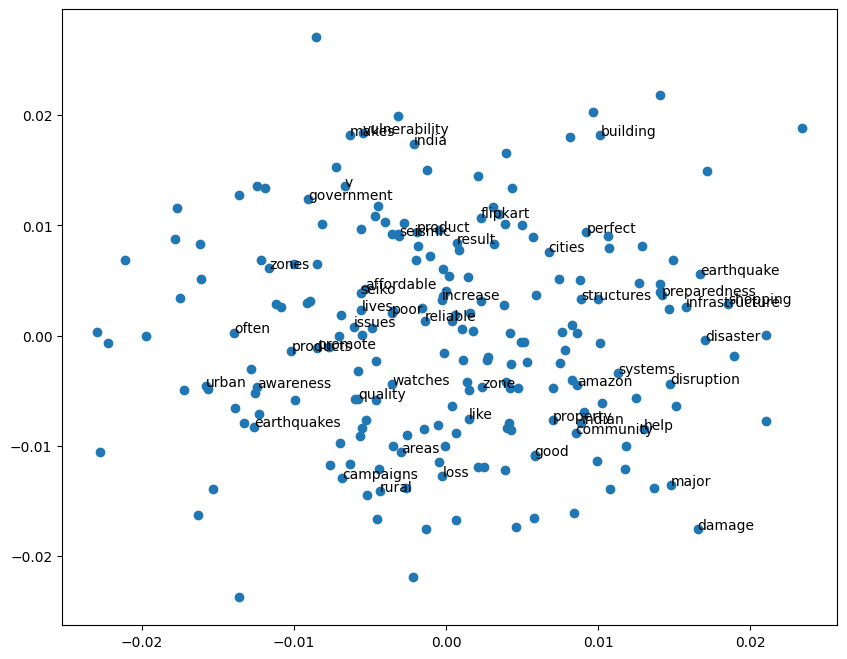

In [29]:
#Tasks-3
#Word2Vec Embeddings:
#Train a Word2Vec model on the corpus.
#Find the 5 most similar words for the words “data,” “analysis,” or any relevant word in your dataset.
#Visualize word embeddings using dimensionality reduction in PCA

w2v_model = Word2Vec(sentences=docs, vector_size=100, window=5, min_count=1, workers=4) # checking the words that appear at least once

# Similar words
print(w2v_model.wv.most_similar("earthquakes", topn=5)) # # similar words that gives the top 5 words most related to earthquakes.
print(w2v_model.wv.most_similar("amazon", topn=5)) # similar words that gives the top 5 words most related to amazon.

# Visualization (PCA)
words = list(w2v_model.wv.index_to_key) # training the Word2Vec model
X = w2v_model.wv[words] # Extract the vector or word embedding

# ploating the word embeddings using dimensionality reduction (PCA)
pca = PCA(n_components=2)
result = pca.fit_transform(X) # apply PCA on word vectors.

# Create a scatter plot of the reduced vectors.
plt.figure(figsize=(10,8))
plt.scatter(result[:,0], result[:,1])
# ploating the scatter plot of the first 50 words
for i, word in enumerate(words[:50]):  # first 50 words
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [30]:
#Tasks-4
#Topic Modeling:
#Apply Latent Dirichlet Allocation (LDA) to discover 3–5 topics in the corpus.
#List the top 5 words for each topic.
#Assign the most relevant topic to each document.
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
# Text Preprocessing or tokenization
txt = [[word for word in doc.lower().split() if word not in stop_words] for doc in text_doc]
# Create a dictionary each unique word to a unique ID.
dictionary = corpora.Dictionary(docs)
# Convert each document into a Bag of Words
corpus = [dictionary.doc2bow(text) for text in docs]
# to discover 4 topics in the corpus.
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=10)
# List the top 5 words for each topic.
print("\nLDA Topics:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")

# assigning the topic to each document
for i, row in enumerate(lda_model[corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    print(f"Document {i+1} -> Topic {row[0][0]+1}")



LDA Topics:
Topic 1: 0.026*"india" + 0.026*"quality" + 0.018*"earthquake" + 0.018*"indian" + 0.018*"product"
Topic 2: 0.023*"seiko" + 0.023*"reliable" + 0.023*"shopping" + 0.013*"issues" + 0.013*"amazon"
Topic 3: 0.024*"earthquake" + 0.024*"seismic" + 0.017*"areas" + 0.017*"rural" + 0.017*"india"
Topic 4: 0.019*"often" + 0.019*"earthquakes" + 0.019*"damage" + 0.019*"india" + 0.011*"perfect"
Document 1 -> Topic 1
Document 2 -> Topic 2
Document 3 -> Topic 3
Document 4 -> Topic 4
Document 5 -> Topic 4
Document 6 -> Topic 3
Document 7 -> Topic 1
Document 8 -> Topic 4
Document 9 -> Topic 4
Document 10 -> Topic 3
Document 11 -> Topic 1
Document 12 -> Topic 3
Document 13 -> Topic 3
Document 14 -> Topic 3
Document 15 -> Topic 1
Document 16 -> Topic 4
Document 17 -> Topic 1
Document 18 -> Topic 2
Document 19 -> Topic 1
Document 20 -> Topic 2
Document 21 -> Topic 3
Document 22 -> Topic 3
Document 23 -> Topic 1
Document 24 -> Topic 2
Document 25 -> Topic 2
Document 26 -> Topic 2
Document 27 -> T

In [23]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis # library for visualizing LDA topic models
# Enable visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary) # LDA visualization.
pyLDAvis.display(vis) # Display the LDA visualization.